In [137]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [138]:
df = pd.read_csv(r'D:\Learnbay\Weekend Project Sunduram sir\Healthcare Domain\indian_liver_patient.csv')

In [139]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [140]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

## Duplicated data

In [141]:
df.duplicated().sum()

13

In [142]:
df.drop_duplicates(keep='first' , inplace=True)

In [143]:
df.duplicated().sum()

0

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 570 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         570 non-null    int64  
 1   Gender                      570 non-null    object 
 2   Total_Bilirubin             570 non-null    float64
 3   Direct_Bilirubin            570 non-null    float64
 4   Alkaline_Phosphotase        570 non-null    int64  
 5   Alamine_Aminotransferase    570 non-null    int64  
 6   Aspartate_Aminotransferase  570 non-null    int64  
 7   Total_Protiens              570 non-null    float64
 8   Albumin                     570 non-null    float64
 9   Albumin_and_Globulin_Ratio  566 non-null    float64
 10  Dataset                     570 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 53.4+ KB


## Find NULL value

In [145]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [146]:
for i in df.columns:
    print("*********************        ",i,"           ***************************")
    print()
    print(set(df[i]))
    print()

*********************         Age            ***************************

{4, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 78, 84, 85, 90}

*********************         Gender            ***************************

{'Male', 'Female'}

*********************         Total_Bilirubin            ***************************

{0.7, 1.0, 1.8, 3.9, 2.7, 1.1, 1.6, 7.3, 2.2, 6.8, 10.9, 6.2, 8.9, 2.0, 14.2, 8.6, 12.7, 15.9, 18.4, 18.0, 11.3, 4.0, 22.7, 23.0, 4.5, 22.8, 18.5, 27.2, 23.2, 22.6, 30.5, 0.5, 1.5, 5.0, 32.6, 26.3, 7.5, 30.8, 8.0, 42.8, 11.0, 11.5, 2.5, 14.5, 75.0, 15.0, 3.0, 3.5, 16.4, 16.6, 19.6, 20.0, 1.9, 1.4, 2.9, 2.4, 22.5, 3.4, 25.0, 5.5, 4.9, 4.4, 5.9, 7.4, 7.9, 9.4, 2.8, 2.3, 3.8, 0.8, 3.3, 1.3, 5.8, 5.3, 6.3, 0.9, 0.6, 0.4, 8.7, 8.2, 10.2, 1.2, 1.7, 14.8, 15.8

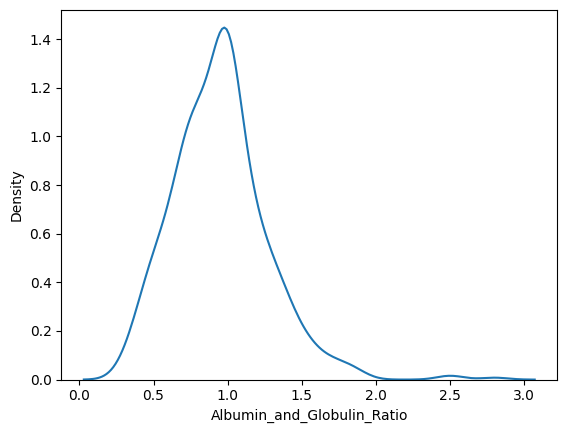

In [147]:
sns.kdeplot(df['Albumin_and_Globulin_Ratio'])
plt.show()

## Bifurcation variable into category(object) and numeric

In [148]:
object_column = df.select_dtypes(include='object').columns
numeric_column = df.select_dtypes(include=['int64' , 'Float64']).columns

In [149]:
print('Numeric COlumn ' , numeric_column)
print()
print('Object  COlumn ' , object_column)

Numeric COlumn  Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

Object  COlumn  Index(['Gender'], dtype='object')


## NULL value Treatement (kNN)

In [150]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(missing_values=np.nan, n_neighbors=5)
df['Albumin_and_Globulin_Ratio'] = imputer.fit_transform(df[['Albumin_and_Globulin_Ratio']])

In [151]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

## Checking Outlier

In [152]:
def distplots(col):
    plt.title(col)
    sns.distplot(df[col])
    plt.tight_layout()
    plt.show()

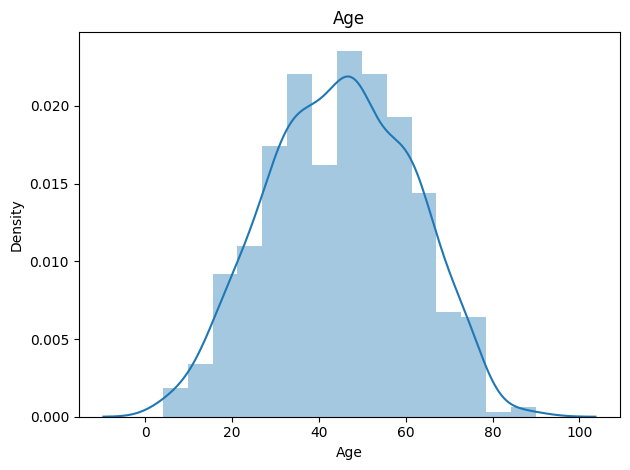

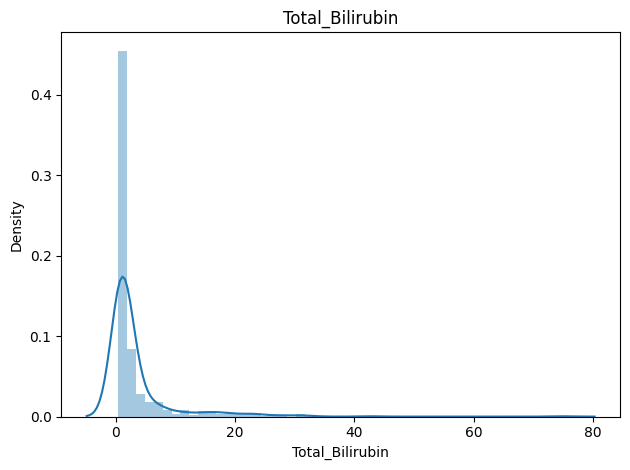

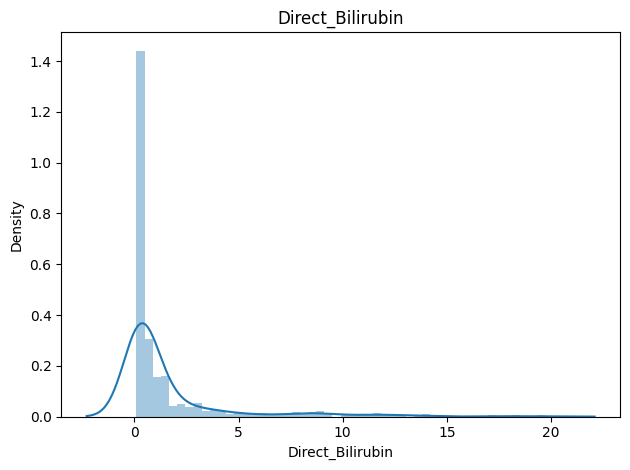

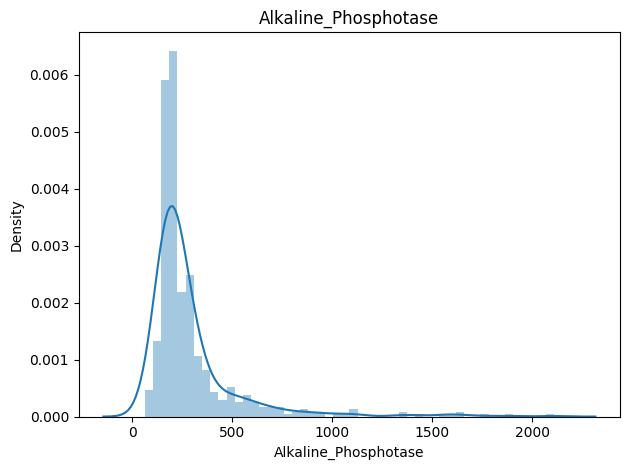

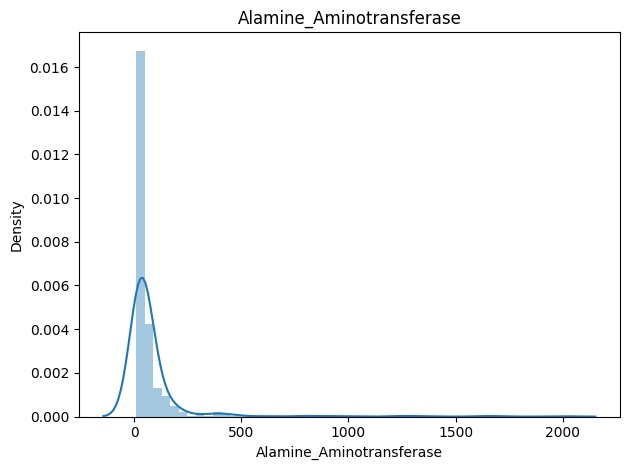

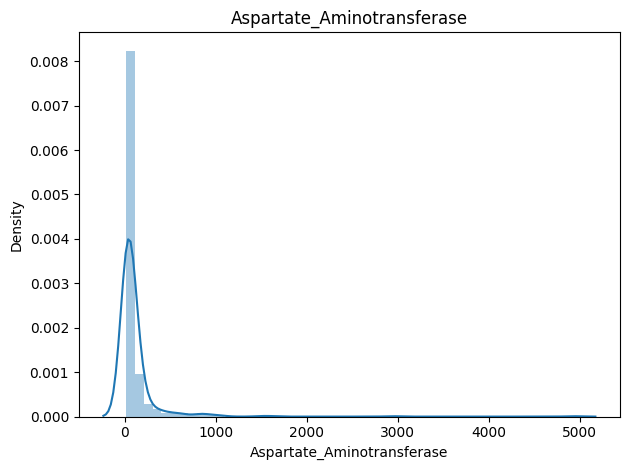

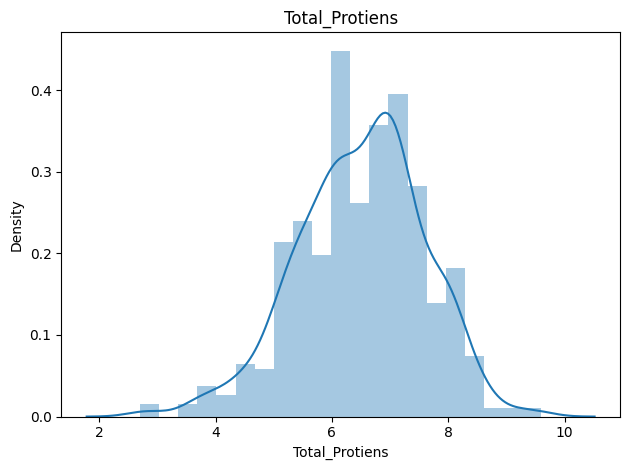

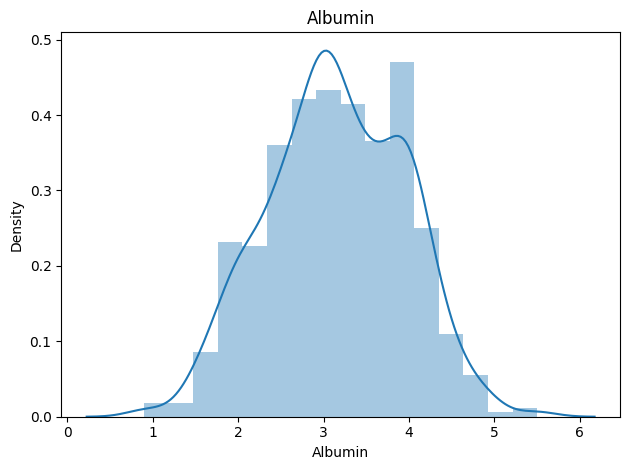

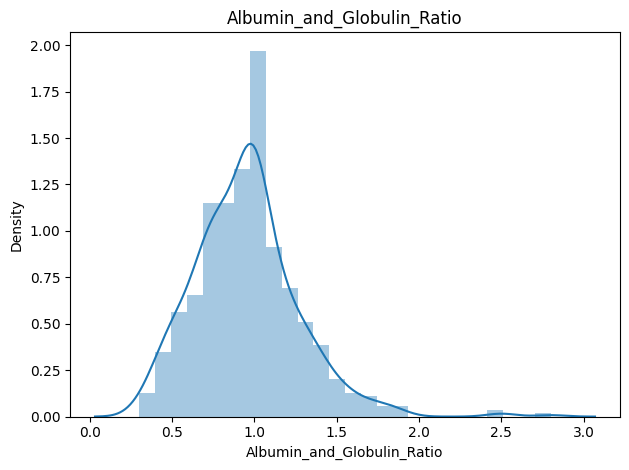

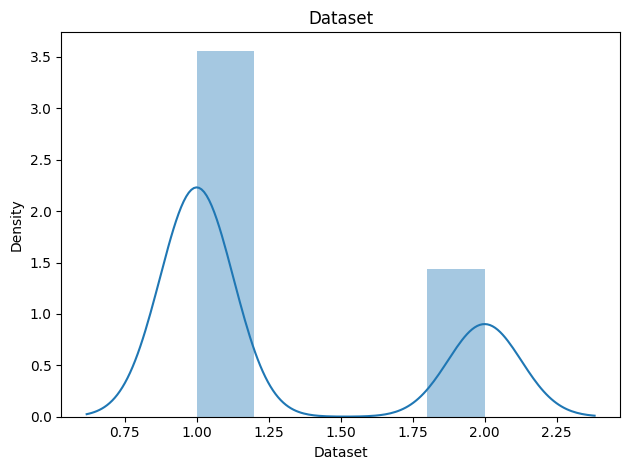

In [153]:
for i in numeric_column:
    distplots(i)

In [154]:
def boxplots(col):
    plt.title(col)
    sns.boxplot(x=df[col])
    plt.tight_layout()
    plt.show()

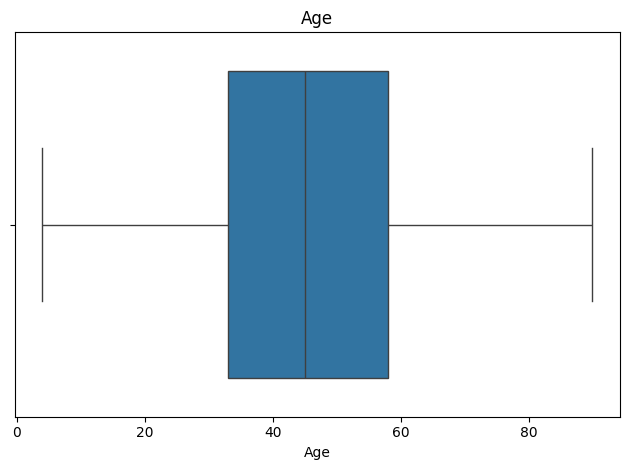

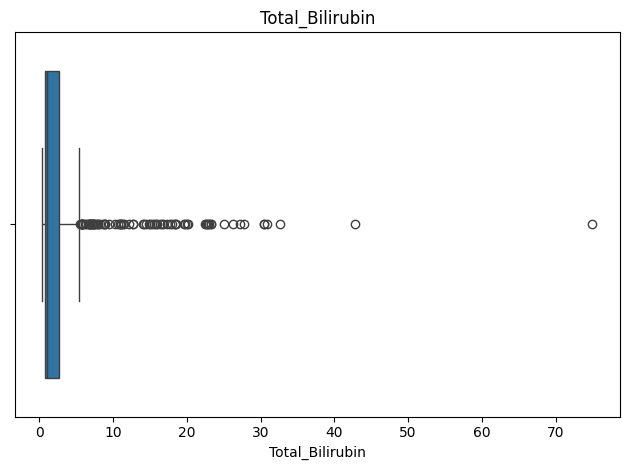

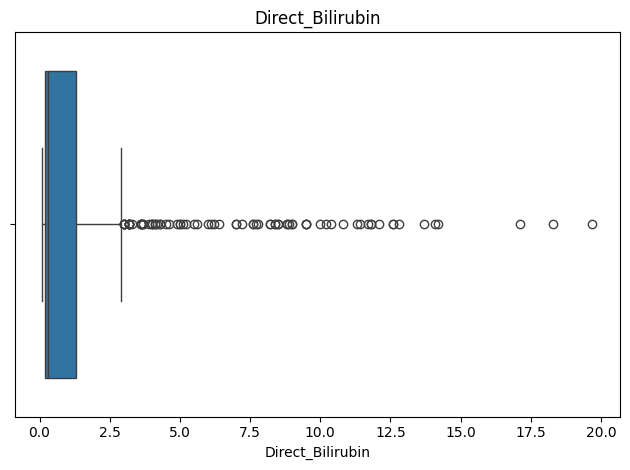

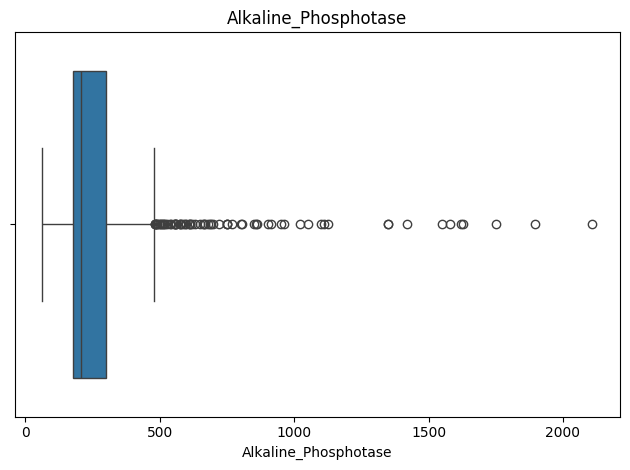

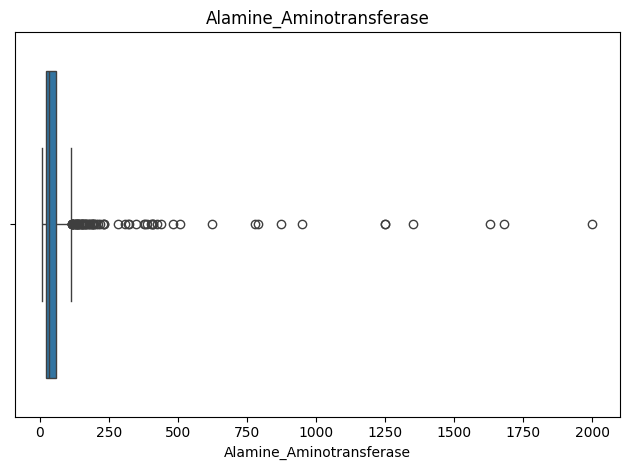

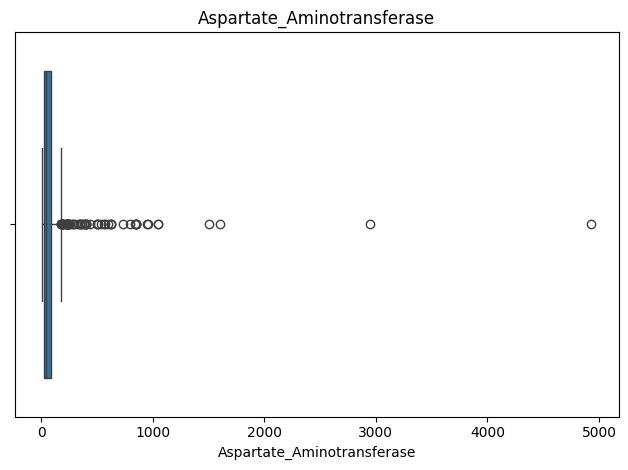

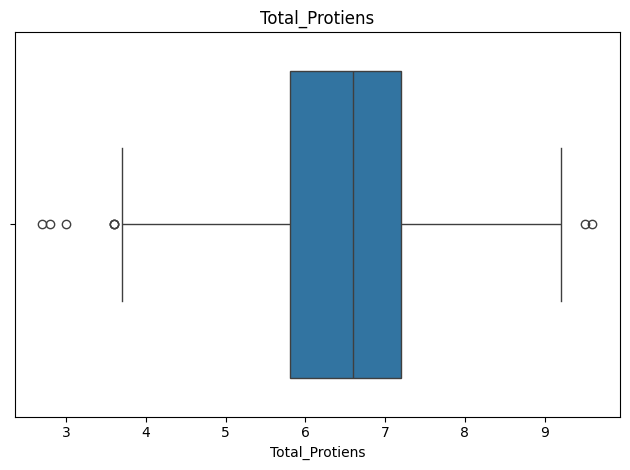

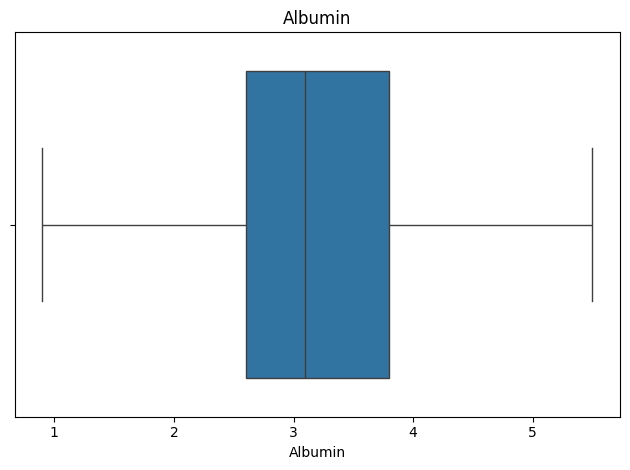

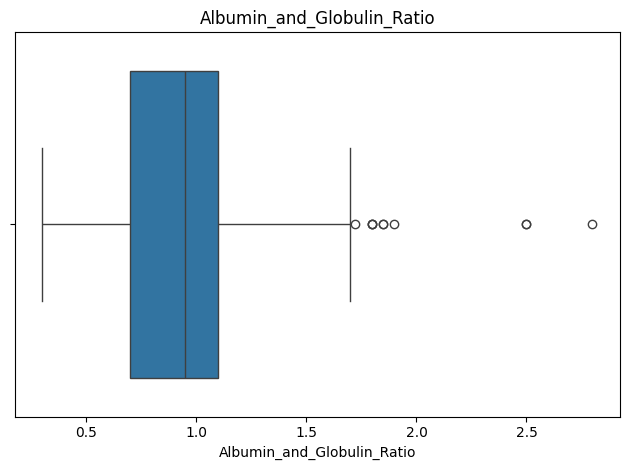

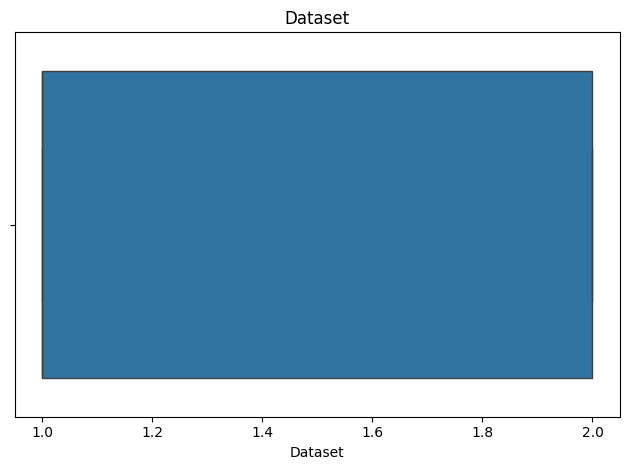

In [155]:
for i in numeric_column:
    boxplots(i)

## Description

In [156]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,44.849123,3.321754,1.497544,291.750877,79.728070,109.380702,6.496316,3.148947,0.948004,1.287719
std,16.242182,6.267941,2.833231,245.291859,181.471697,290.880671,1.088300,0.796813,0.318510,0.453097
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.948004,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.000000,86.750000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


## Split the data into Dependent and independent variable 

In [157]:
x = df.drop(columns=['Dataset']) #Independent
y = df['Dataset'] #Dependent

In [158]:
x.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio'],
      dtype='object')

In [159]:
y

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Dataset, Length: 570, dtype: int64

In [160]:
y = np.where(y==1 , 0 , 1)

In [161]:
y = pd.DataFrame(y , columns=['Dataset'])
y.value_counts()

Dataset
0          406
1          164
Name: count, dtype: int64

## Classifing the Features

In [ ]:
def classify_feature(x):
    categorical_feature = []
    non_categori_feature = []
    discreate_feature = []
    continus_feature = []

    for column in x.columns:
        if x[column].dtype == 'object':
            if x[column].nunique() < 3:
                categorical_feature.append(column)
            else:
                non_categori_feature.append(column)
        elif x[column].dtype in ['Int64' , 'float64']:
            if x[column].nunique() < 10:
                discreate_feature.append(column)
            else:
                continus_feature.append(column)
    
    return categorical_feature , non_categori_feature, discreate_feature , continus_feature

In [163]:
categorical , non_categorical , discreate ,containous = classify_feature(df)

In [164]:
categorical

['Gender']

In [165]:
non_categorical

[]

In [166]:
discreate 

[]

In [167]:
containous

['Total_Bilirubin',
 'Direct_Bilirubin',
 'Total_Protiens',
 'Albumin',
 'Albumin_and_Globulin_Ratio']

## Encoding (Label encoding)

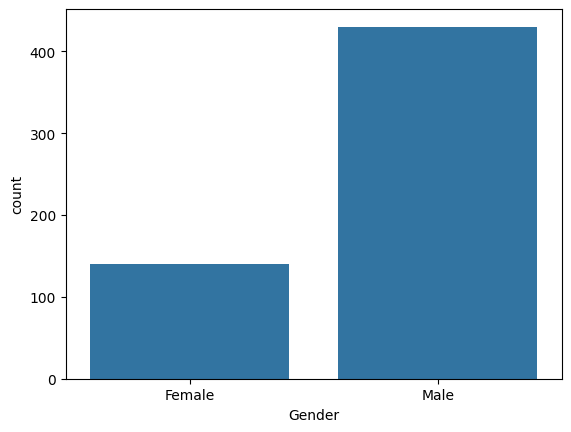

In [168]:
sns.countplot(x=x['Gender'])
plt.show()

In [169]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
x['Gender'] = encoder.fit_transform(x['Gender'])

In [170]:
x['Gender'].head()

0    0
1    1
2    1
3    1
4    1
Name: Gender, dtype: int32

In [171]:
x.dtypes

Age                             int64
Gender                          int32
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
dtype: object

## Imbalanced Treamtemt 

In [172]:
y.value_counts(normalize=True)

Dataset
0          0.712281
1          0.287719
Name: proportion, dtype: float64

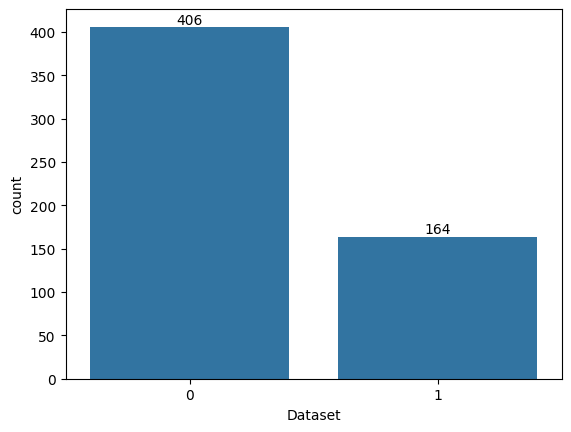

In [173]:
ax = sns.countplot(x=y['Dataset'])
ax.bar_label(ax.containers[0])
plt.show()

### SMOTE

In [174]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_smote , y_smote = smote.fit_resample(x,y)

In [175]:
x_smote.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40


In [176]:
y_smote.value_counts(normalize=True)

Dataset
0          0.5
1          0.5
Name: proportion, dtype: float64

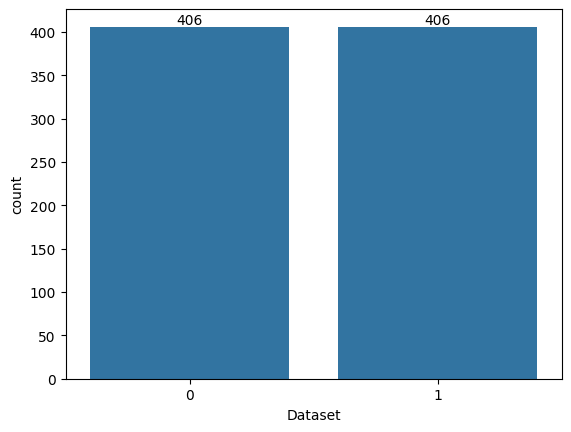

In [177]:
ax = sns.countplot(x=y_smote['Dataset'])
ax.bar_label(ax.containers[0])
plt.show()

### Date is Now Balanced 

## Split the Data into Train and Test

In [178]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train ,y_test = train_test_split(x_smote ,y_smote , test_size=0.3  , random_state=42 , stratify=y_smote)

In [179]:
x_train.shape ,x_test.shape , y_train.shape ,y_test.shape

((568, 10), (244, 10), (568, 1), (244, 1))

## Build the Machine Learning Model 

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
# evaluation matrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

      Method Used  Accuracy
0  LogitRegession  0.745902
1           Dtree  0.709016
2         RForest  0.774590
3             XGB  0.766393
4             KNN  0.676230
5             SVM  0.692623
6             NBT  0.709016
7          Voting  0.754098
Axes(0.125,0.11;0.775x0.77)


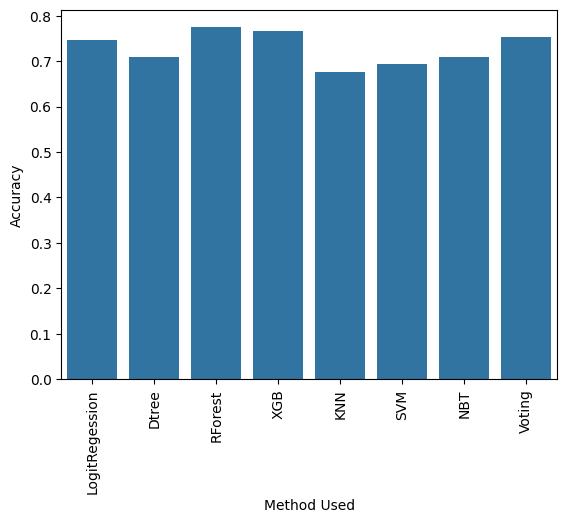

In [181]:

# LogisticRegression
logit = LogisticRegression()
logit = logit.fit(x_train, y_train)
y_pred_lr = logit.predict(x_test) 
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# DecisionTree
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)
y_pred_dt = dtree.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# RandomForest
rforest = RandomForestClassifier(criterion='entropy' , n_estimators=50)
rforest = rforest.fit(x_train, y_train)
y_pred_rf = rforest.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# XGBoost
xgboost = XGBClassifier()
xgboost = xgboost.fit(x_train, y_train)
y_pred_xg = xgboost.predict(x_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)

# KNN
knn = KNeighborsClassifier()
knn = knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
 
# SVM
svm = SVC()
svm = svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Naive Based Theorem
nbt = GaussianNB()
nbt = nbt.fit(x_train, y_train)
y_pred_nbt = nbt.predict(x_test)
accuracy_nbt = accuracy_score(y_test, y_pred_nbt)

# Voting Classifier - combining all the above model together by using voting classifier approach
model_evc = VotingClassifier(estimators = [('logit',logit), ('dtree',dtree), ('rforest',rforest),('xgboost',xgboost),
                                           ('knn',knn),('svm',svm),('nbt',nbt)])
model_evc = model_evc.fit(x_train, y_train)
pred_evc = model_evc.predict(x_test)
accuracy_evc = accuracy_score(y_test, pred_evc)

list1 = ['LogitRegession','Dtree','RForest','XGB','KNN','SVM','NBT','Voting']
list2 = [accuracy_lr,accuracy_dt,accuracy_rf,accuracy_xg,accuracy_knn,accuracy_svm,accuracy_nbt,accuracy_evc]
list3 = [logit,dtree,rforest,xgboost,knn,svm,nbt,model_evc]

df_accuracy = pd.DataFrame({"Method Used":list1, "Accuracy":list2})

print(df_accuracy)

chart = sns.barplot(x="Method Used", y="Accuracy", data=df_accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)                          
                               

### Observation 
- Random Forest giving more accurate result

## Bias Variance Trade-off (RandomForest)

In [183]:
pred_rf_train = rforest.predict(x_train)
pred_rf_test = rforest.predict(x_test)

print("Tranning ",accuracy_score(y_train ,pred_rf_train))
print("Test  ",accuracy_score(y_test ,pred_rf_test))

Tranning  1.0
Test   0.7745901639344263


## Cross Validation 

In [184]:
from sklearn.model_selection import cross_val_score
training = cross_val_score(rforest , x_train , y_train , cv=10)
training.mean()

0.7800438596491228

## Evaluation Matrix

In [186]:
from sklearn.metrics import classification_report , confusion_matrix
print("************************")
print("Training :",classification_report(y_train, pred_rf_train))
print("************************")
print("Test :",classification_report(y_test, pred_rf_test))

************************
Training :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       284
           1       1.00      1.00      1.00       284

    accuracy                           1.00       568
   macro avg       1.00      1.00      1.00       568
weighted avg       1.00      1.00      1.00       568

************************
Test :               precision    recall  f1-score   support

           0       0.82      0.70      0.76       122
           1       0.74      0.84      0.79       122

    accuracy                           0.77       244
   macro avg       0.78      0.77      0.77       244
weighted avg       0.78      0.77      0.77       244



In [187]:
print('Train')
print(confusion_matrix(y_train, pred_rf_train))
print()
print("Test")
print(confusion_matrix(y_test, pred_rf_test))

Train
[[284   0]
 [  0 284]]

Test
[[ 86  36]
 [ 19 103]]


## Deployment

In [ ]:
# import pickle
# pickle_out = open("Liver_classifer.pkl" , "wb")
# pickle.dump(model_evc ,pickle_out)
# pickle_out.close()